# Visualization of CNN Layers and Filters

## Outline
1. Using torchvision.datasets with a custom folder of images
2. Occlusion analysis with pretrained model
3. Filter visualisation with pretrained model

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch 
import torch.nn as nn
import torchvision
#import datasets in torchvision
import torchvision.datasets as datasets

#import model zoo in torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import models

## Filter Visualization

In [3]:
#for filter visualization, we will use alexnet pretrained with imagenet data

alexnet_model = models.alexnet(pretrained=False)

TypeError: alexnet() got an unexpected keyword argument 'pretrained'

In [41]:
alexnet_model.features[0].weight.shape

torch.Size([64, 3, 11, 11])

In [4]:
alex = models.__dict__['alexnet'](sobel=True)
alex.top_layer = None

In [5]:
checkpoint = torch.load("exp/checkpoints/checkpoint_7.0.pth.tar")

In [45]:
del checkpoint['state_dict']['top_layer.weight']
del checkpoint['state_dict']['top_layer.bias']

In [14]:
checkpoint['state_dict']['features.module.0.weight'].data

tensor([[[[-3.1706e-01,  1.2682e-02, -6.8074e-02,  ..., -4.6456e-02,
            8.0177e-02,  1.6198e-01],
          [-1.6483e-01,  2.7293e-02, -8.7619e-02,  ..., -6.5056e-03,
            5.9565e-02,  8.9221e-02],
          [-1.5631e-01,  4.0101e-02,  2.6883e-02,  ..., -1.3116e-01,
           -5.2662e-02,  7.4390e-02],
          ...,
          [-5.4534e-02,  7.7694e-02,  3.1696e-03,  ..., -1.6863e-01,
           -3.0224e-02,  6.1910e-04],
          [-6.1154e-02,  7.9644e-02,  4.8945e-02,  ..., -2.0685e-01,
           -2.3352e-02, -4.7651e-02],
          [ 8.2362e-03,  8.2883e-02,  1.7410e-02,  ..., -1.3362e-01,
           -3.7699e-03, -1.4633e-01]],

         [[-7.8378e-02,  9.3809e-02,  6.9531e-02,  ...,  5.8635e-02,
            1.1107e-01,  5.4573e-02],
          [-2.3118e-02, -2.0708e-02, -5.8776e-02,  ..., -1.3842e-02,
           -4.3397e-02, -2.5238e-02],
          [ 1.7035e-02,  2.8832e-03,  1.2109e-02,  ...,  2.3785e-02,
            3.4017e-02,  3.8745e-02],
          ...,
     

In [15]:
alex.features[0].weight.data = checkpoint['state_dict']['features.module.0.weight'].data

In [9]:
print(checkpoint['state_dict']['features.module.0.weight'].shape)

torch.Size([96, 2, 11, 11])


In [55]:
checkpoint_weights = list(checkpoint['state_dict'].keys())
checkpoint_weights

['features.module.0.weight',
 'features.module.0.bias',
 'features.module.1.weight',
 'features.module.1.bias',
 'features.module.1.running_mean',
 'features.module.1.running_var',
 'features.module.1.num_batches_tracked',
 'features.module.4.weight',
 'features.module.4.bias',
 'features.module.5.weight',
 'features.module.5.bias',
 'features.module.5.running_mean',
 'features.module.5.running_var',
 'features.module.5.num_batches_tracked',
 'features.module.8.weight',
 'features.module.8.bias',
 'features.module.9.weight',
 'features.module.9.bias',
 'features.module.9.running_mean',
 'features.module.9.running_var',
 'features.module.9.num_batches_tracked',
 'features.module.11.weight',
 'features.module.11.bias',
 'features.module.12.weight',
 'features.module.12.bias',
 'features.module.12.running_mean',
 'features.module.12.running_var',
 'features.module.12.num_batches_tracked',
 'features.module.14.weight',
 'features.module.14.bias',
 'features.module.15.weight',
 'features.mo

In [53]:
alex.features[0]

Conv2d(2, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))

In [47]:
alex.load_state_dict(checkpoint['state_dict'])

RuntimeError: Error(s) in loading state_dict for AlexNet:
	Missing key(s) in state_dict: "features.0.weight", "features.0.bias", "features.1.weight", "features.1.bias", "features.1.running_mean", "features.1.running_var", "features.4.weight", "features.4.bias", "features.5.weight", "features.5.bias", "features.5.running_mean", "features.5.running_var", "features.8.weight", "features.8.bias", "features.9.weight", "features.9.bias", "features.9.running_mean", "features.9.running_var", "features.11.weight", "features.11.bias", "features.12.weight", "features.12.bias", "features.12.running_mean", "features.12.running_var", "features.14.weight", "features.14.bias", "features.15.weight", "features.15.bias", "features.15.running_mean", "features.15.running_var". 
	Unexpected key(s) in state_dict: "features.module.0.weight", "features.module.0.bias", "features.module.1.weight", "features.module.1.bias", "features.module.1.running_mean", "features.module.1.running_var", "features.module.1.num_batches_tracked", "features.module.4.weight", "features.module.4.bias", "features.module.5.weight", "features.module.5.bias", "features.module.5.running_mean", "features.module.5.running_var", "features.module.5.num_batches_tracked", "features.module.8.weight", "features.module.8.bias", "features.module.9.weight", "features.module.9.bias", "features.module.9.running_mean", "features.module.9.running_var", "features.module.9.num_batches_tracked", "features.module.11.weight", "features.module.11.bias", "features.module.12.weight", "features.module.12.bias", "features.module.12.running_mean", "features.module.12.running_var", "features.module.12.num_batches_tracked", "features.module.14.weight", "features.module.14.bias", "features.module.15.weight", "features.module.15.bias", "features.module.15.running_mean", "features.module.15.running_var", "features.module.15.num_batches_tracked". 

In [8]:
def plot_filters_single_channel_big(t):
    
    #setting the rows and columns
    nrows = t.shape[0]*t.shape[2]
    ncols = t.shape[1]*t.shape[3]
    
    
    npimg = np.array(t.numpy(), np.float32)
    npimg = npimg.transpose((0, 2, 1, 3))
    npimg = npimg.ravel().reshape(nrows, ncols)
    
    npimg = npimg.T
    
    fig, ax = plt.subplots(figsize=(ncols/10, nrows/200))    
    imgplot = sns.heatmap(npimg, xticklabels=False, yticklabels=False, cmap='gray', ax=ax, cbar=False)

In [9]:
def plot_filters_single_channel(t):
    
    #kernels depth * number of kernels
    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    
    nrows = 1 + nplots//ncols
    #convert tensor to numpy image
    npimg = np.array(t.numpy(), np.float32)
    
    count = 0
    fig = plt.figure(figsize=(ncols, nrows))
    
    #looping through all the kernels in each channel
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i, j].numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            ax1.imshow(npimg)
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
   
    plt.tight_layout()
    plt.show()

In [10]:
def plot_filters_multi_channel(t):
    
    #get the number of kernals
    num_kernels = t.shape[0]    
    
    #define number of columns for subplots
    num_cols = 12
    #rows = num of kernels
    num_rows = num_kernels
    
    #set the figure size
    fig = plt.figure(figsize=(num_cols,num_rows))
    
    #looping through all the kernels
    for i in range(t.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        
        #for each kernel, we convert the tensor to numpy 
        npimg = np.array(t[i].numpy(), np.float32)
        #standardize the numpy image
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        
    plt.savefig('myimage.png', dpi=100)    
    plt.tight_layout()
    plt.show()

In [11]:
def plot_weights(model, layer_num, single_channel = True, collated = False):
  
  #extracting the model features at the particular layer number
  layer = model.features[layer_num]
  
  #checking whether the layer is convolution layer or not 
  if isinstance(layer, nn.Conv2d):
    #getting the weight tensor data
    weight_tensor = model.features[layer_num].weight.data
    
    if single_channel:
      if collated:
        plot_filters_single_channel_big(weight_tensor)
      else:
        plot_filters_single_channel(weight_tensor)
        
    else:
      if weight_tensor.shape[1] == 3:
        plot_filters_multi_channel(weight_tensor)
      else:
        print("Can only plot weights with three channels with single channel = False")
        
  else:
    print("Can only visualize layers which are convolutional")

In [12]:
#visualize weights for alexnet - first conv layer

plot_weights(alexnet, 0, single_channel = False)

AttributeError: 'dict' object has no attribute 'features'

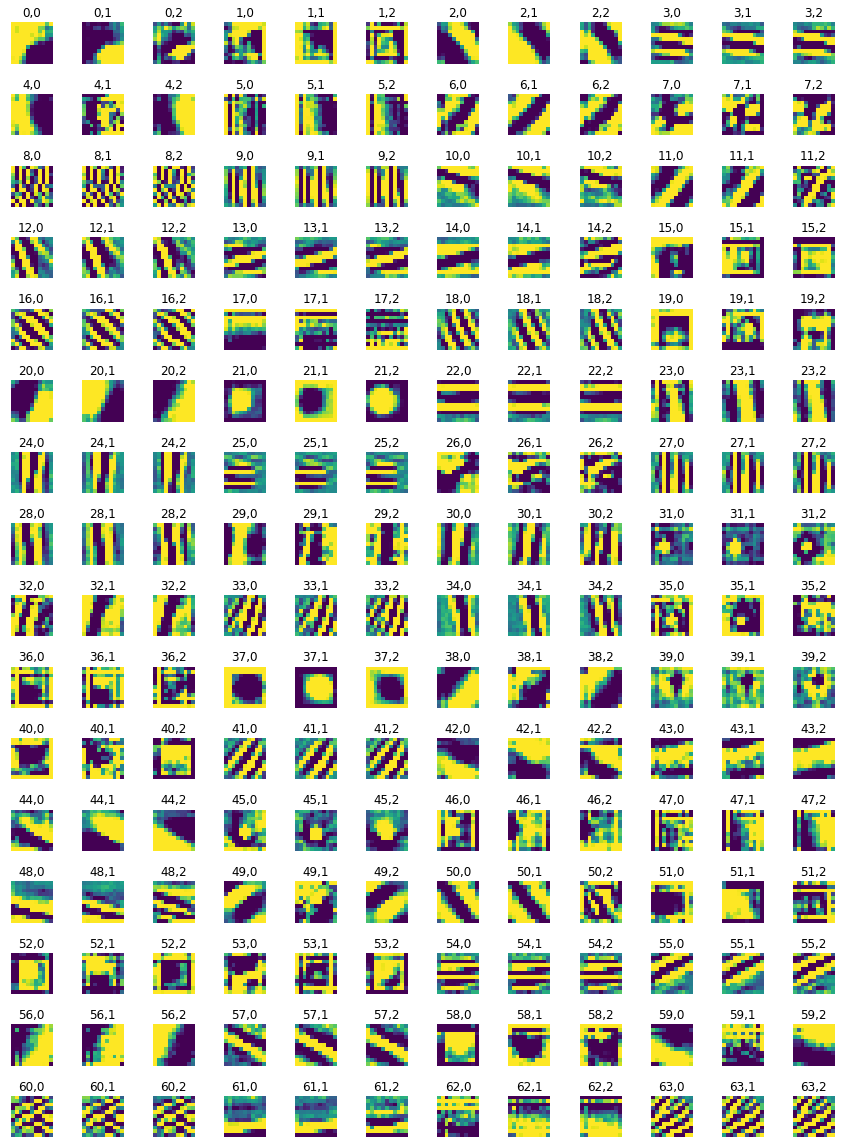

In [ ]:
#plotting single channel images

plot_weights(alexnet, 0, single_channel = True)

In [ ]:
#plot for 3rd layer -> 2nd conv layer
plot_weights(alexnet, 3, single_channel = True)

In [ ]:
 plot_weights(alexnet, 0, single_channel = True, collated = True)

In [ ]:
plot_weights(alexnet, 3, single_channel = True, collated = True)

In [ ]:
plot_weights(alexnet, 6, single_channel = True, collated = True)

In [ ]:
#for vgg16

plot_weights(model, 0, single_channel = True, collated = True)

In [ ]:
plot_weights(model, 2, single_channel = True, collated = True)

In [ ]:
plot_weights(model, 5, single_channel = True, collated = True)

In [ ]:
plot_weights(model, 0, single_channel = False, collated = False)